# Exploratory Data Analysis

## Importing modules

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

## Load data

In [68]:
data = pd.read_csv('../Data/final_train.csv')
data.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id,date,month,day,hour,dayofweek
0,59383,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,19,80.316334,40.239252,2021-08-01,8,1,0,Sunday
1,59384,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,16,15.172487,63.912685,2021-08-01,8,1,0,Sunday
2,59385,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,13,74.196424,98.288079,2021-08-01,8,1,0,Sunday
3,59386,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,15,51.950635,6.563484,2021-08-01,8,1,0,Sunday
4,59387,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,20,62.417972,26.483666,2021-08-01,8,1,0,Sunday


## Basic info about the data

In [69]:
data.shape

(291231, 18)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TRANSACTION_ID      291231 non-null  int64  
 1   CUSTOMER_ID         291231 non-null  int64  
 2   TERMINAL_ID         291231 non-null  int64  
 3   TX_AMOUNT           291231 non-null  float64
 4   TX_FRAUD            291231 non-null  int64  
 5   x_customer_id       291231 non-null  float64
 6   y_customer_id       291231 non-null  float64
 7   mean_amount         291231 non-null  float64
 8   std_amount          291231 non-null  float64
 9   mean_nb_tx_per_day  291231 non-null  float64
 10  nb_terminals        291231 non-null  int64  
 11  x_terminal_id       291231 non-null  float64
 12  y_terminal_id       291231 non-null  float64
 13  date                291231 non-null  object 
 14  month               291231 non-null  int64  
 15  day                 291231 non-nul

In [71]:
data.isnull().sum()

TRANSACTION_ID        0
CUSTOMER_ID           0
TERMINAL_ID           0
TX_AMOUNT             0
TX_FRAUD              0
x_customer_id         0
y_customer_id         0
mean_amount           0
std_amount            0
mean_nb_tx_per_day    0
nb_terminals          0
x_terminal_id         0
y_terminal_id         0
date                  0
month                 0
day                   0
hour                  0
dayofweek             0
dtype: int64

In [72]:
data.duplicated().sum()

0

**Insight**:
- There are no duplicate in data.
- There are no null values
- All columns are numerical data type except date time

## Checking target variable

In [73]:
data['TX_FRAUD'].value_counts()

TX_FRAUD
0    284649
1      6582
Name: count, dtype: int64

In [74]:
(data.TX_FRAUD.value_counts()/len(data['TX_FRAUD'])) * 100

TX_FRAUD
0    97.739938
1     2.260062
Name: count, dtype: float64

**Insight**: 
- Data is imbalance
- Only, 2.26% data are of fraud transaction, while 97.74% transaction are clean.

## Vizualization

<Axes: xlabel='TX_FRAUD', ylabel='count'>

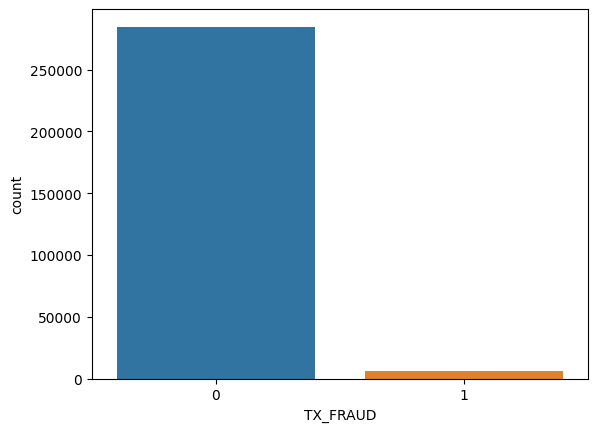

In [75]:
## Target variable 
sns.countplot(data=data, x='TX_FRAUD')

In [76]:
def kdeplot(feature):
    plt.figure(figsize=(10, 3))
    plt.title("Distribution for {}".format(feature))
    plot1 = sns.kdeplot(data[data['TX_FRAUD'] == 0][feature].dropna(), color= 'grey', label= 'FRAUD: No', fill = True)
    plot2 = sns.kdeplot(data[data['TX_FRAUD'] == 1][feature].dropna(), color= 'Red', label= 'FRAUD: Yes')
    plt.legend(["LEGITMATE","FRAUDULENT"],loc='upper right')

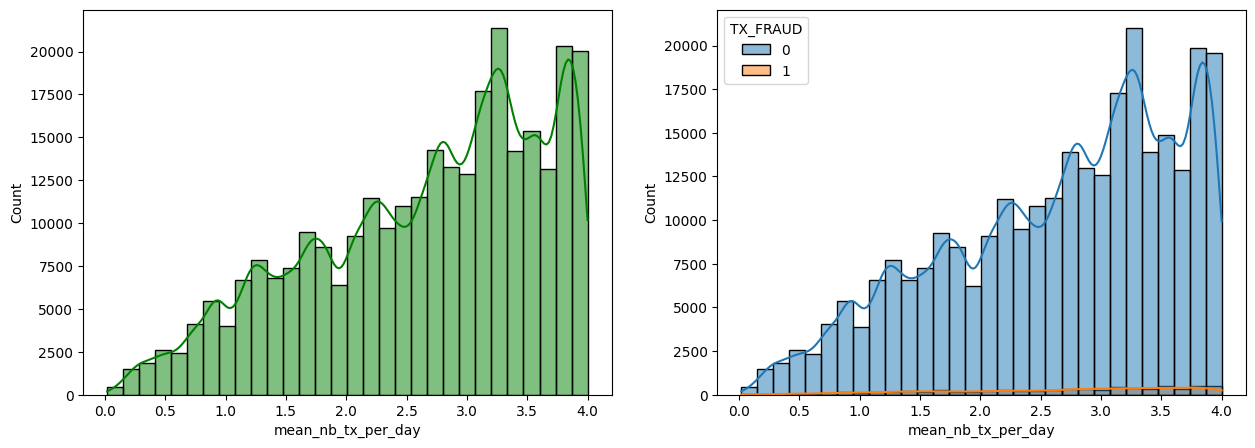

In [77]:
## kde for mean transaction per day
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'mean_nb_tx_per_day', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'mean_nb_tx_per_day', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

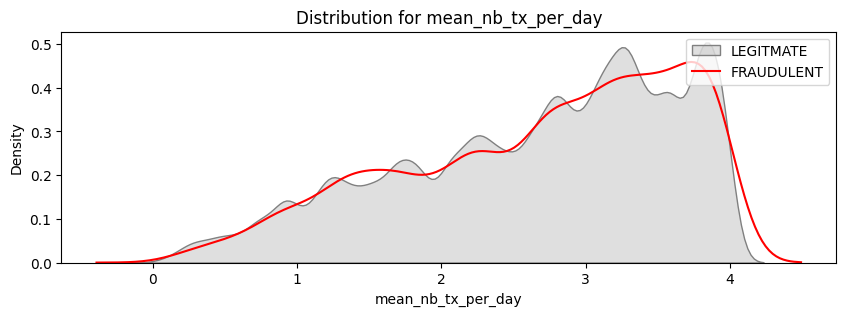

In [78]:

kdeplot('mean_nb_tx_per_day')

**Insight**:
- Majority of mean number of trasaction per day are between 2 to 4 transaction 

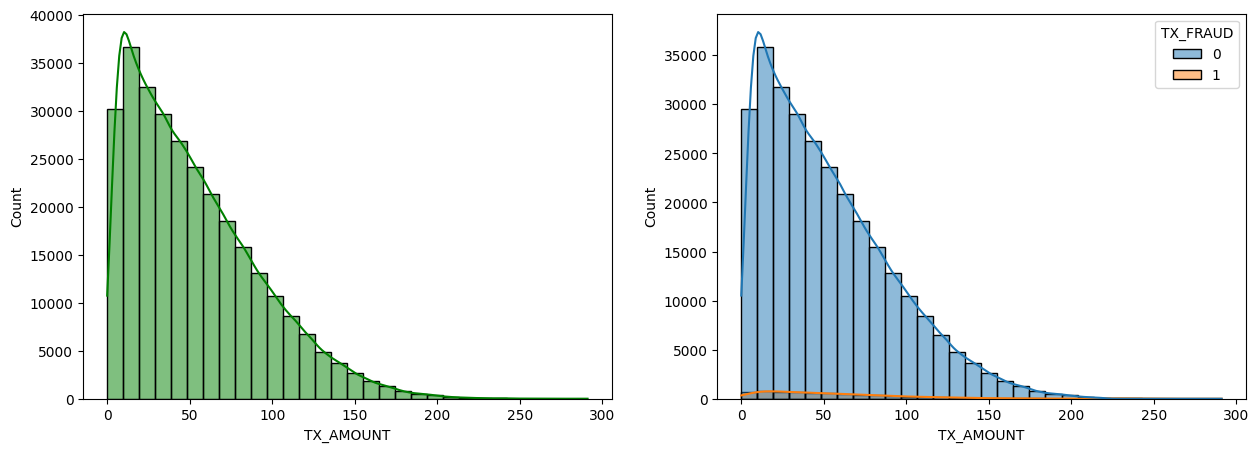

In [79]:
## kde for Transaction amount
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'TX_AMOUNT', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'TX_AMOUNT', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

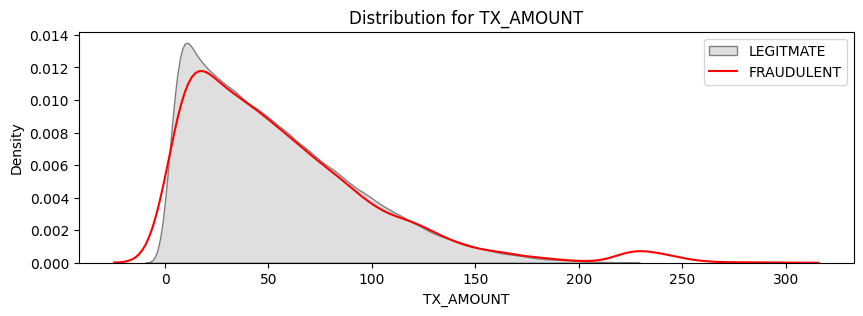

In [80]:
kdeplot('TX_AMOUNT')

**Insights**:
- Majority of transaction amount are between 0-80

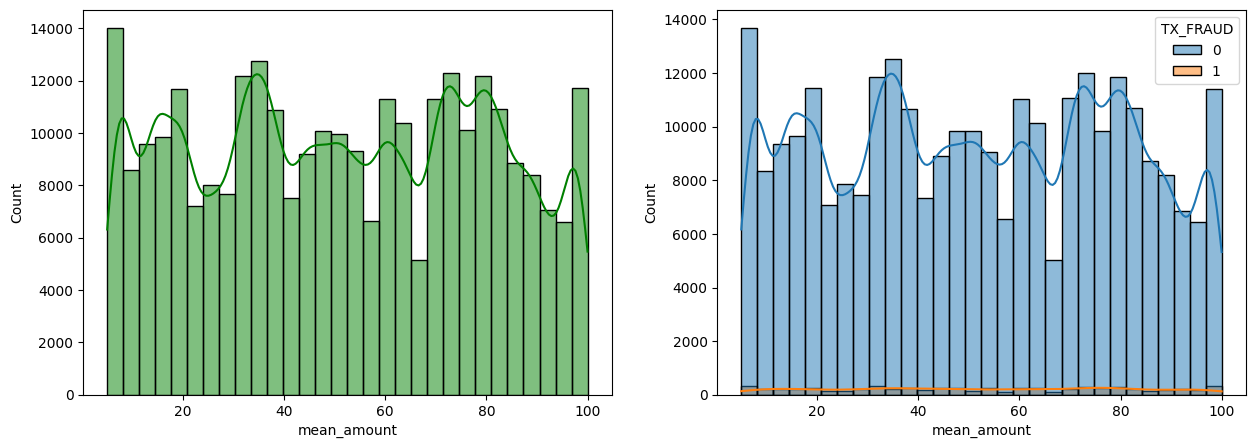

In [81]:
## kde for mean transaction per day
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'mean_amount', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'mean_amount', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

<Axes: xlabel='month', ylabel='count'>

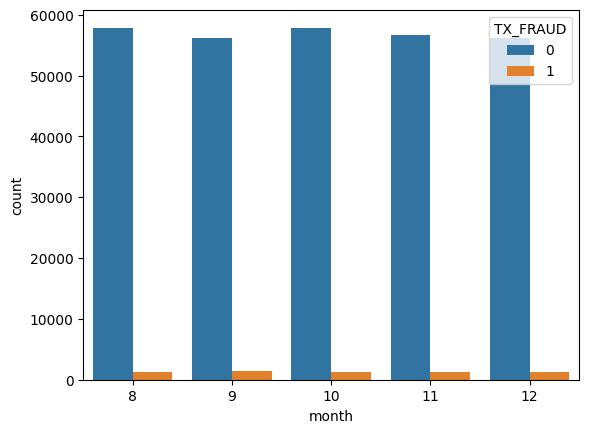

In [82]:
#month wrt target variable
sns.countplot(data=data, x="month", hue="TX_FRAUD")

<Axes: xlabel='day', ylabel='count'>

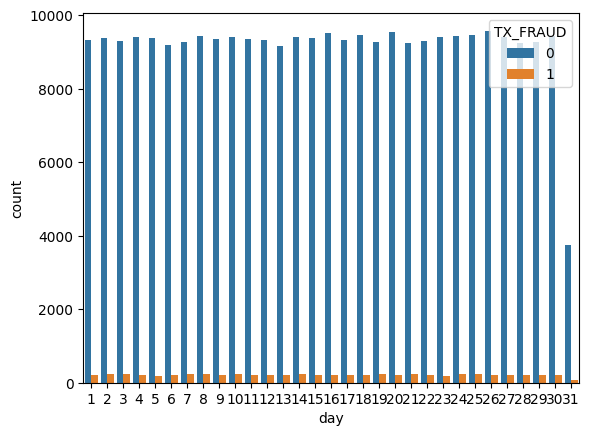

In [83]:
#days wrt target variable
sns.countplot(data=data, x="day", hue="TX_FRAUD")

<Axes: xlabel='dayofweek', ylabel='count'>

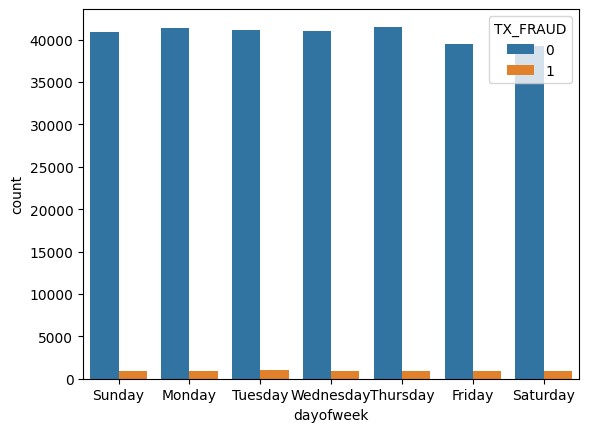

In [84]:

#day of the week wrt target variable
sns.countplot(data=data, x="dayofweek", hue="TX_FRAUD")

Insight:
- Number of fradulent cases are almost same every day.
- Most number of legitimate transactions are made on Thursday
- Least number of legitimate transactions are made on Saturday.

<Axes: xlabel='nb_terminals', ylabel='count'>

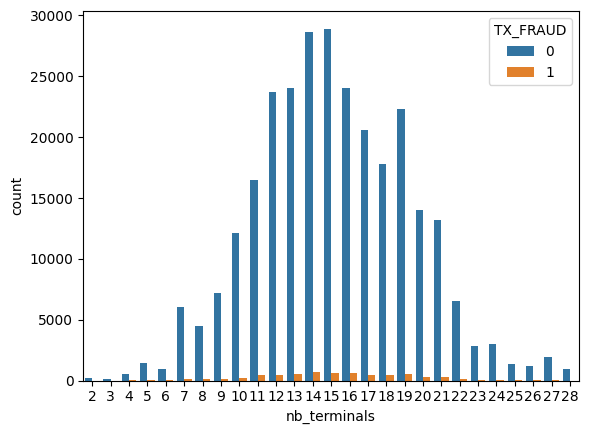

In [85]:
sns.countplot(data=data, x="nb_terminals", hue="TX_FRAUD")

Insight
- Highest number of fradulent transactions is when the number of terminals that the customer can make transactions is 14.
- Fradulent transactions are the most where the number of terminals that the customer can make transactions is between 11 and 21.
- Highest number of legitimate transactions are when the number of terminals that the customer can make transactions is 15 follwed by 14.
- Therefore, when the number of terminals that the customer can make transactions is 14 and 15 most number of legitimate as well as fradulent transactions are made.

<Axes: xlabel='hour', ylabel='count'>

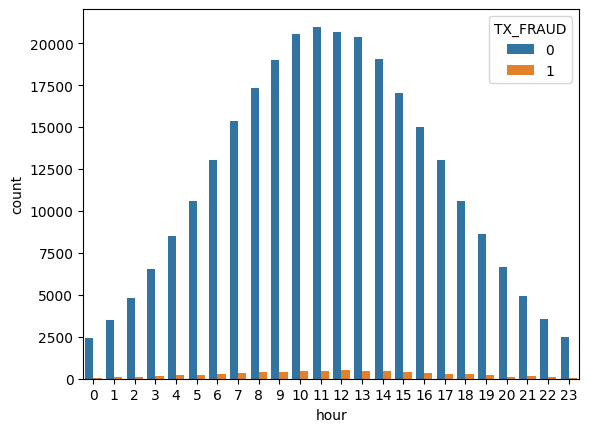

In [86]:
sns.countplot(data=data, x='hour', hue = 'TX_FRAUD')

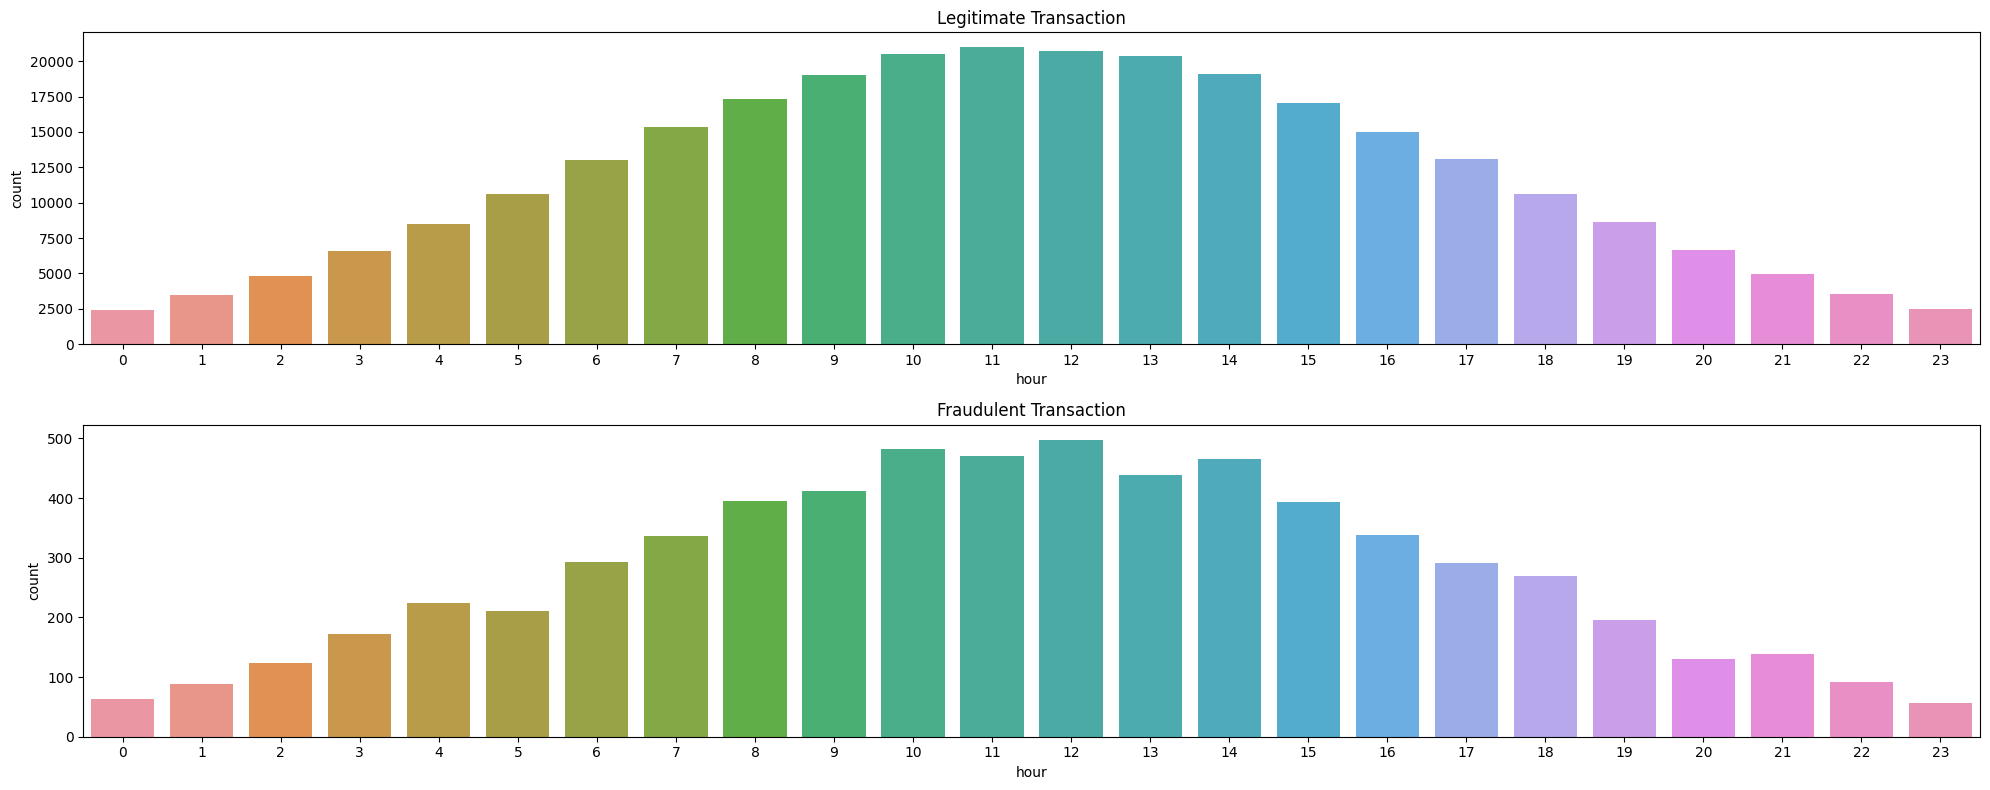

In [87]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Legitimate Transaction")
sns.countplot(data=data[data.TX_FRAUD == 0], x= 'hour', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.countplot(data=data[data.TX_FRAUD == 1], x= 'hour', ax=axs[1])

plt.tight_layout()

Insight
- Highest number of fradulent transactions has taken place in the 12th hour.
- Most number of fradulent transactions has taken place in between the 4th and 19th hour of the day
- Highest number of legitimate transactions has taken place at the 11th hour follwed by the 12th hour and 10th hour.
- Therefore, at the 12th hour most of the legitimate and fradulent transactions has taken plac

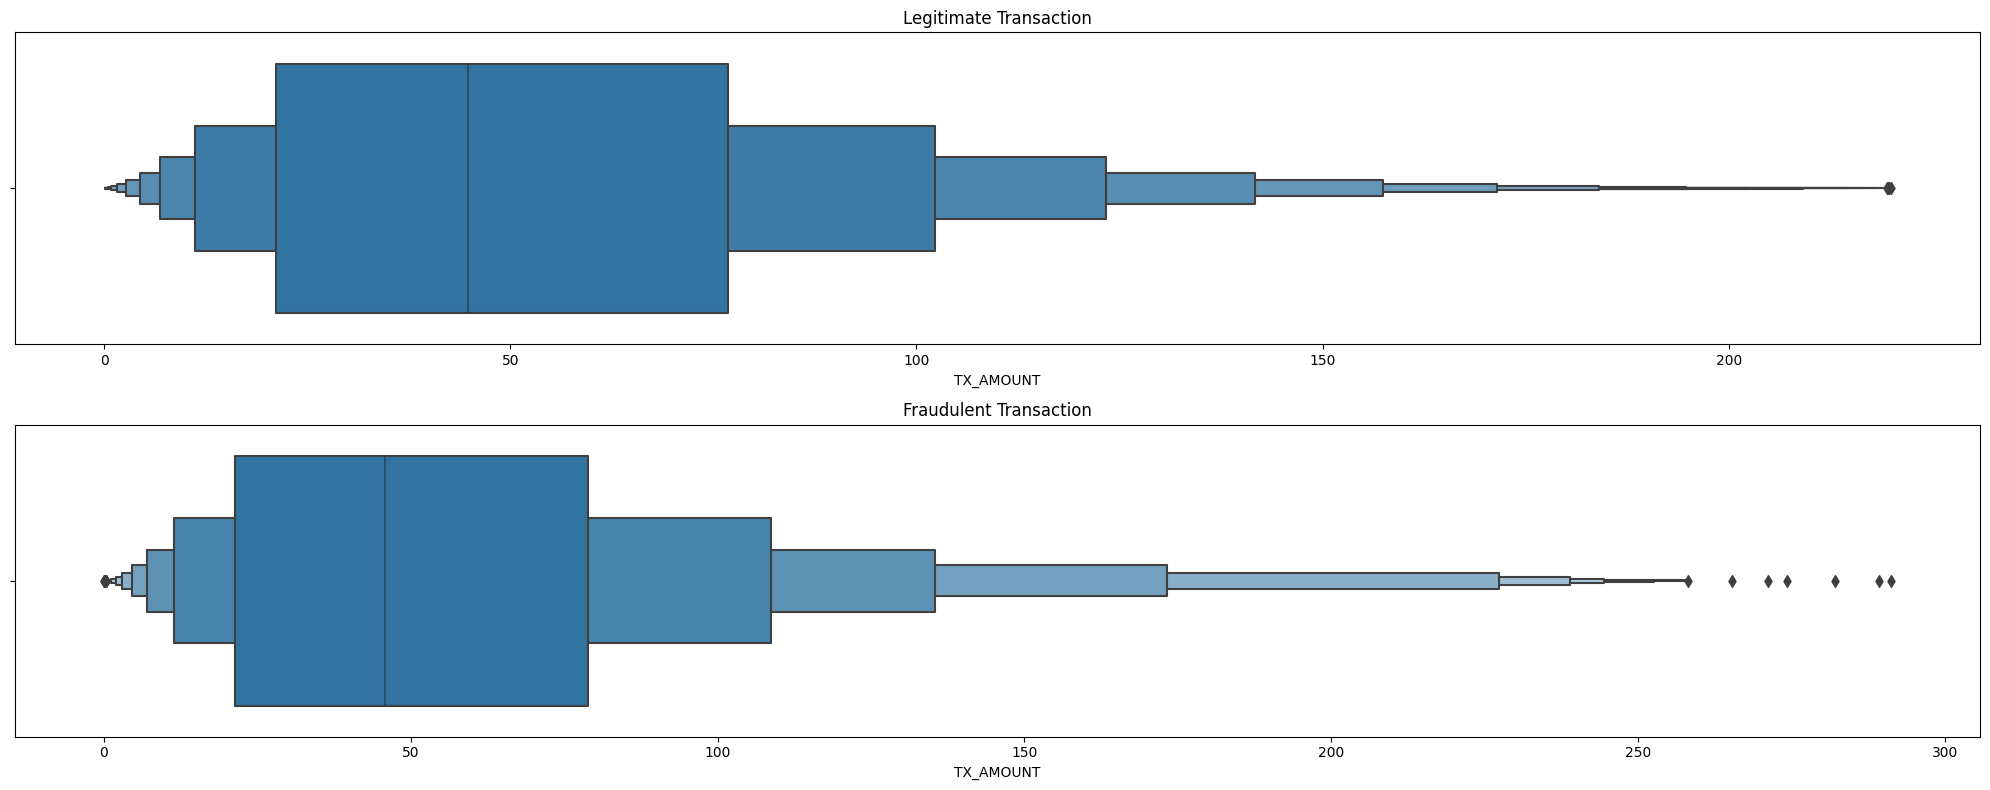

In [88]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Legitimate Transaction")
sns.boxenplot(data=data[ data.TX_FRAUD == 0 ], x= 'TX_AMOUNT', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=data[ data.TX_FRAUD == 1 ], x= 'TX_AMOUNT', ax=axs[1])

plt.tight_layout()

## Outliers

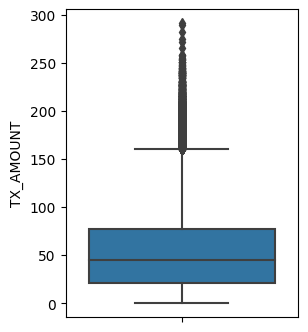

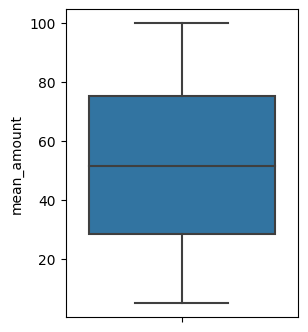

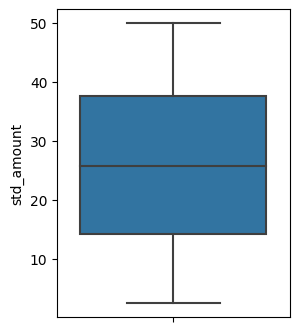

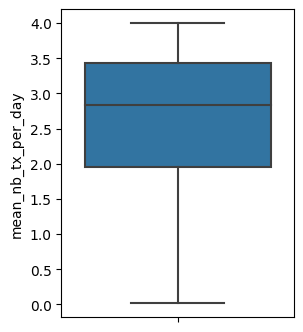

In [89]:

column_names = ['TX_AMOUNT','mean_amount','std_amount','mean_nb_tx_per_day']
def identify_outliers(give_df_name, give_column_name):
    for i in column_names:
        fig = plt.figure(figsize=(3,4))
        sns.boxplot(data = data, y = i)
plt.show()

identify_outliers(data, column_names)

Q1 = 21.13 Q2 =  44.77 Q3 =  76.85
upper 160.43
lower -62.45


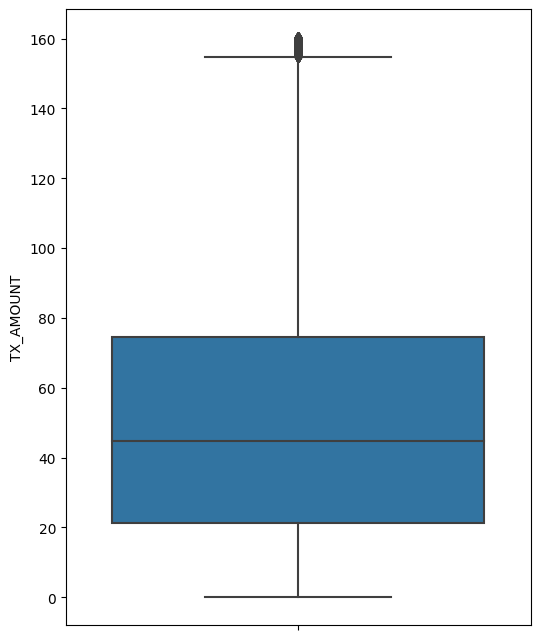

In [90]:
Q1 = np.percentile(data['TX_AMOUNT'], 25)
Q2 = np.percentile(data['TX_AMOUNT'], 50)
Q3 = np.percentile(data['TX_AMOUNT'], 75)
IQR = Q3 - Q1        
print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

upper_val = Q3 + (1.5 * IQR)
print('upper', upper_val)
lower_val = Q1 - (1.5 * IQR)
print('lower', lower_val)

data.loc[data['TX_AMOUNT'] > upper_val, 'TX_AMOUNT'] = np.median(data['TX_AMOUNT'])
data.loc[data['TX_AMOUNT'] < lower_val, 'TX_AMOUNT'] = np.median(data['TX_AMOUNT'])
        
fig = plt.figure(figsize = (6,8))
sns.boxplot(data = data,y = 'TX_AMOUNT')
plt.xticks(rotation = 'horizontal')
plt.show()

Insight
- TX-AMOUNT contains a lot of outliers in the range of 150 - 160

In [91]:
len(data[data['TX_FRAUD'] == 1])

6582

In [92]:
outlier_fraud_data = data[(data['TX_AMOUNT'] > 150) & (data['TX_FRAUD'] == 1)]

In [93]:
len(outlier_fraud_data)

50

Insight
- There are 50 values which are fraud and are in range of outliers.